# Introduction

## Zillow Prize

The [Zillow Prize](https://www.zillow.com/promo/Zillow-prize/) is a data science and machine learning competition organized by the [Zillow real estate company](https://www.zillow.com/). 
The competition is host by [Kaggle](https://www.kaggle.com/), a company that provides datasets and computational kernels for data science challenges. Kaggle was [purchased by Google](https://techcrunch.com/2017/03/07/google-is-acquiring-data-science-community-kaggle/) earlier this year. 
The Zillow Prize competition has recently declared to be the [second largest data science challenge on Kaggle](https://www.prnewswire.com/news-releases/zillow-prize-ranks-as-one-of-most-popular-machine-learning-contests-of-all-time-300539347.html).
The purpose of the Zillow prize is to inspire data scientists around the world to work on improving the accuracy of the Zillow "Zestimate" <cite data-cite="5251998/F6YV2BYE"></cite> home price estimate algorithm. 

## Zestimate Algorithm

Zillow’s Zestimate home valuation was first released in 2006 <cite data-cite="5251998/6ZB7HZKT"></cite> and has since had a major impact on the United States real estate industry. The Zestimate algorithm created a new standard of providing free, publicly available housing data and home price estimates. 
The Zestimate algorithm relies on ["7.5 million statistical and machine learning models"](https://www.prnewswire.com/news-releases/zillow-prize-ranks-as-one-of-most-popular-machine-learning-contests-of-all-time-300539347.html) that have been refined over the years to have a [margin of error on only 5%](https://www.kaggle.com/c/zillow-prize-1).

The real estate industry is a major contributor to the U.S economy and was worth roughly [30 trillion dollars in 2016](https://www.zillow.com/research/2016-total-home-value-rents-14028/). Homeownership equity is a major form of wealth that Americans hold, while mortgages are a major type of American private debt. It is extremely important for U.S. homeowners and for the U.S. economy that home prices are estimated correctly. Without proper estimates, lender and borrowers cannot confidently monitor their assets and liabilities. Overevaluation of real estate assets and the potential returns on real estate debt for lenders has been linked to the great recession. <cite data-cite="5251998/GKWP3DLG"></cite> 

## My Goal

My goal in working with the Zillow Prize data was to answer the question of which features in the dataset are the most important determinants of the major evaluation metric for the Zillow Prize. This metric is called "logerror" in the data and is defined as the difference between the log of Zestimate price and the log of the actual sales price. To achieve this goal, I cleaned the provided housing valuation data and employed two different machine learning methods, random forest and xgboost, to calculate importance scores for each of the features in the cleaned dataset.

# Methods

## Data

I obtained the data from [Kaggle website](https://www.kaggle.com/c/zillow-prize-1/data). The data consisted of the following files:

- properties_2016.csv.zip
- properties_2017.csv.zip
- sample_submission.csv
- train_2016_v2.csv.zip
- train_2017.csv.zip
- zillow_data_dictionary.xlsx

The `zillow_data_dictionary.xlsx` is a code book that explains the data.
The data are available on the [Kaggle website](https://www.kaggle.com/c/zillow-prize-1/data), but I also made the data available on [figshare](https://figshare.com/s/a54a364682b4b02caa5a) where they can be accessed without the need to create/enter a username and password. 

The data can also be accessed as part of my [Zillow Kaggle kernel](https://www.kaggle.com/marskar/random-forest-and-xgboost-feature-determination).

## Analysis

Data analysis was done in Jupyter Notebook (formerly known as IPython Notebook) <cite data-cite="5251998/SH25XT8L"></cite> Integrated Development Environment using the Python language <cite data-cite="5251998/FGTD82L2"></cite> and a number of software packages. I used NumPy <cite data-cite="5251998/3SWILWGR"></cite> and Pandas <cite data-cite="5251998/K3NZPGU9"></cite> for data wrangling. To calculate the importance scores, I used the Scikit-learn and XGBoost <cite data-cite="5251998/9VNLRITL"></cite> machine learning libraries. Finally, I visualized the data with the Matplotlib <cite data-cite="5251998/WP5LZ6AZ"></cite> and Seaborn <cite data-cite="5251998/Z5Z8R3J8"></cite> libraries.


## Reproducibility

Reproducibility is extremely important in scientific research yet many examples of problematic studies exist in the literature <cite data-cite="5251998/UXR4ZTUS"></cite>.

The names and versions of each package used herein are listed in the accompanying `env.yml` file in the `config` folder.
The computational environment used to analyze the data can be recreated using this `env.yml` file and the [`conda` package and environment manager](https://conda.io/docs/using/envs.html) available as part of the [Anaconda distribution of Python](https://www.anaconda.com/download/).

Additionally, details on how to setup a Docker image capable of running the analysis is included in the `README.md` file in the `config` folder.

The code in the form of a jupyter notebook (`01_zillow_MWS.ipynb`) or Python script (`01_zillow_MWS.py`), can also be run on the Kaggle website (this requires logging in with a username and password) by accessing the [Zillow Kaggle kernel](https://www.kaggle.com/marskar/random-forest-and-xgboost-feature-determination) I created.

More information on the details of how this project was created and the computational environment was configured can be found in the accompanying `README.md` file.

# Results

## Missing values

The dataset provided for the Zillow challenge consisted of 58 features. I first determined the percent representation of missing for each of these features (Figure 1).
I then used median imputation to fill in the missing values for the all of the features. I decided not to remove any features based on the percent missing values.

## Feature Importance

Next, I used two prediction methods: Random Forest and XGBoost to obtain importance scores for each of the remaining features (Figure 2). I made a final list of features by removing any features that had an importance of less than 0.001 from Random Forest model or an XGBoost F score importance of less than 10. Of the initial 58 features, 39 features remained in final feature list. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

/Users/marskar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Set plot parameters
from IPython.display import set_matplotlib_formats

plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
### Seaborn style
sns.set_style("whitegrid")

In [20]:
# Input data files are available in the "../input/" directory, on Kaggle and the GitHub repo for this project.
prop = pd.read_csv("../input/properties_2016.csv", low_memory=False)
prop.shape

(2985217, 58)

In [4]:
# Now I will calculate the percent missing values(NaN)
nan = prop.isnull().sum()/len(prop)*100

In [5]:
### Plotting NaN counts
nan_sorted = nan.sort_values(ascending=False).to_frame().reset_index()
nan_sorted.columns = ['Column', 'percentNaN']
nan_sorted.head();

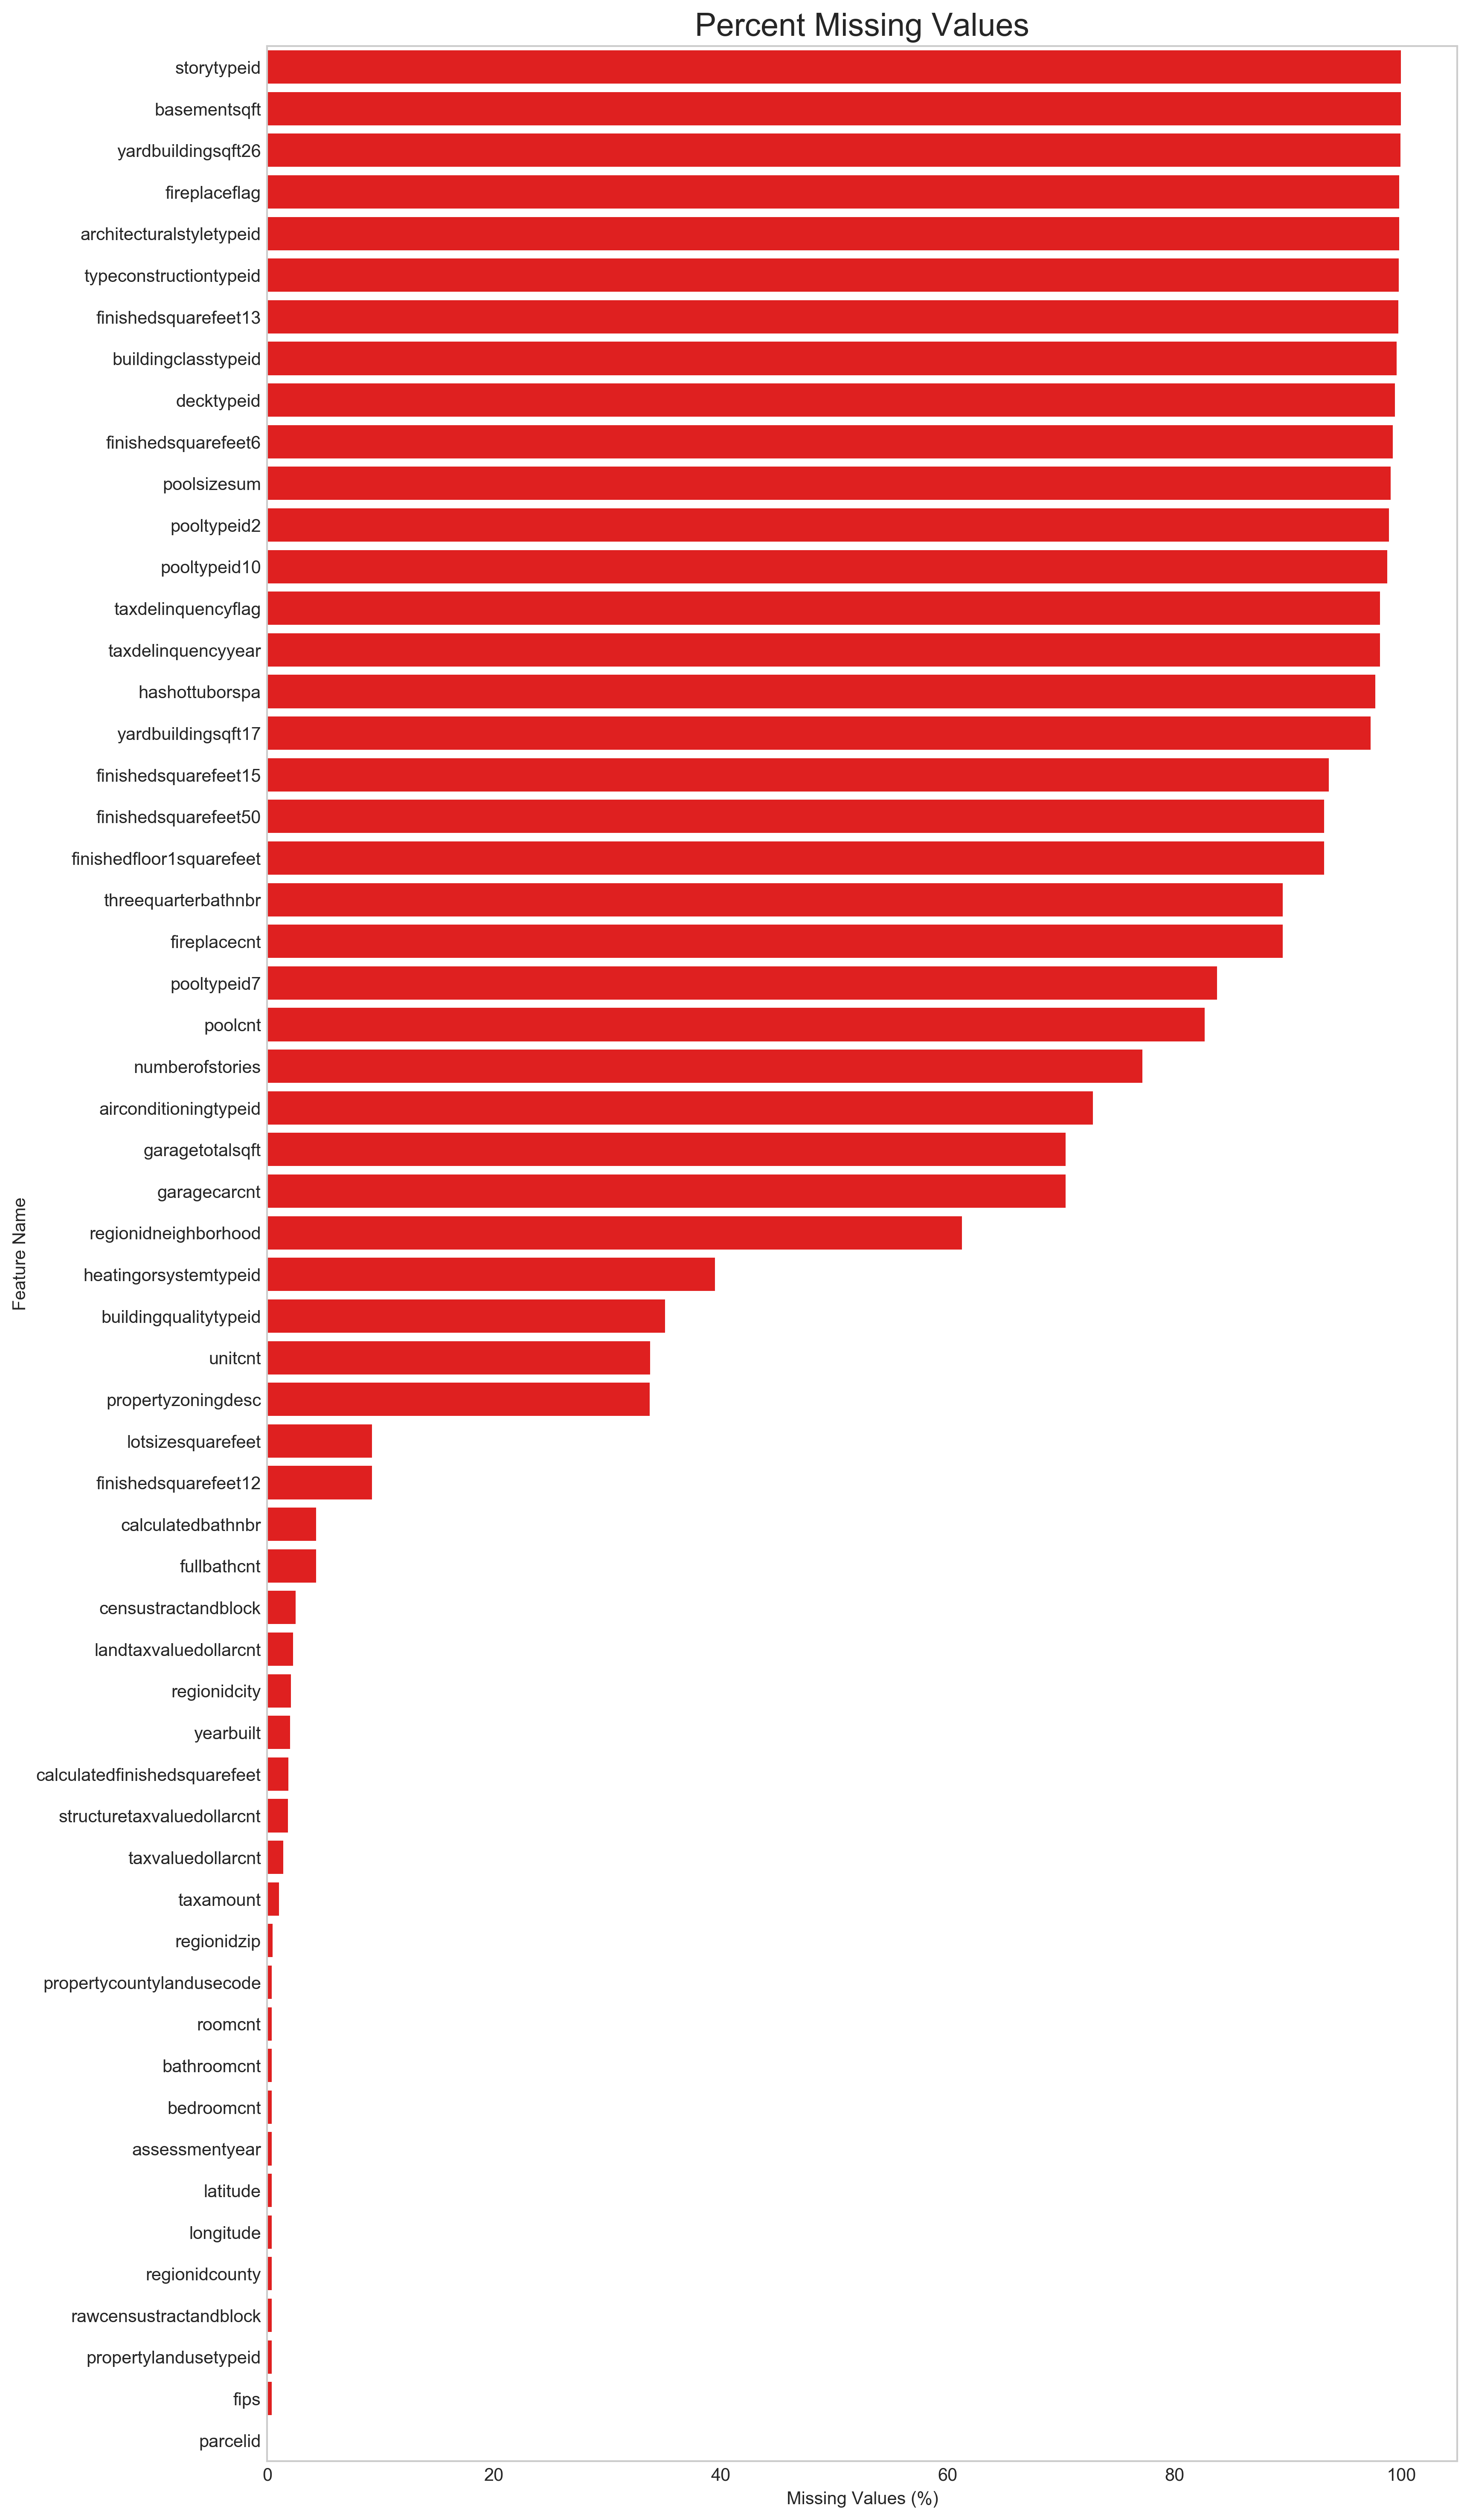

In [6]:
fig, ax = plt.subplots(figsize=(12, 25), dpi=300)
sns.barplot(x="percentNaN", y="Column", data=nan_sorted, color='Red', ax=ax)
ax.set(xlabel="Missing Values (%)", ylabel="Feature Name")
ax.set_title("Percent Missing Values",fontsize= 19)
ax.xaxis.grid()
plt.show()

In [21]:
train = pd.read_csv("../input/train_2016_v2.csv", parse_dates=["transactiondate"])

(90275, 3)

In [8]:
train['transaction_month'] = pd.DatetimeIndex(train['transactiondate']).month
train.sort_values('transaction_month', axis=0, ascending=True, inplace=True)

In [9]:
# Here I will merge the train and properties datasets
train = pd.merge(train, prop, on='parcelid', how='left')

In [10]:
# Now I will impute the missing values with median values to compute the importance scores
median_values_train = train.median(axis=0)
train = train.fillna(median_values_train, inplace=True)

In [11]:
for c in train[['transactiondate', 'hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']]:
    label = LabelEncoder()
    label.fit(list(train[c].values))
    train[c] = label.transform(list(train[c].values))

x_train = train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = train['logerror']

In [13]:
rf = RandomForestRegressor(n_estimators=30, max_features=None)
rf.fit(x_train, y_train);

In [14]:
rf_importance = rf.feature_importances_
rf_importance_df = pd.DataFrame()
rf_importance_df['features'] = x_train.columns
rf_importance_df['importance'] = rf_importance
rf_importance_df.head();

In [15]:
rf_importance_df.sort_values('importance', axis=0, inplace=True, ascending=False)

rf_importance_df_trim = rf_importance_df[rf_importance_df.importance>0.001]

rf_importance_df_trim.tail()

rf_feature_list = rf_importance_df_trim.features

In [16]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=x_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

In [ ]:
xgbdict = model.get_score()

xgb_importance_df = pd.DataFrame()
xgb_importance_df['features'] = xgbdict.keys()
xgb_importance_df['importance'] = xgbdict.values()

xgb_importance_df.sort_values('importance', axis=0, inplace=True, ascending=False)

xgb_importance_df_trim = xgb_importance_df[xgb_importance_df.importance>=10]

xgb_feature_list = xgb_importance_df_trim.features

feature_list = xgb_feature_list.append(rf_feature_list)

feature_list = feature_list.unique()

In [24]:
feature_list = list(feature_list)

In [18]:
# Create  a 1 x 2 grid of subplots
num_rows = 1
num_cols = 2

fig = plt.figure(figsize=(200, 256))
plt.subplots_adjust(wspace=0.5)


sns.set_context("poster", font_scale=10)
# [1]
ax = plt.subplot2grid((num_rows, num_cols), (0,0))
sns.barplot(x="importance", y="features", data=rf_importance_df, color='Green', ax=ax)
ax.set(xlabel="Importance (Variance explained)", ylabel="")
ax.set_title('Random Forest Importance', fontsize= 165)
# [2]
ax = plt.subplot2grid((num_rows, num_cols), (0,1))
xgb.plot_importance(model, height=0.85, grid = False, color="blue", ax=ax)
ax.xaxis.grid()
ax.set_title('XGBoost Importance', fontsize= 165)
ax.set(xlabel="Importance (F score)", ylabel="")
plt.show()

# Conclusions

## Limitations

For my first Kaggle competition, I was only interested in how to determine which features would be most likely to be useful in making a prediction. One major limitation of the analysis I did was that I did not validate my calculated importance scores using data set aside for this purpose. Another major limitation was that I did not show that a model with a smaller set of high-importance features could perform at a similar level as a model with all of the features. 

## Lessons Learned

In addition to learning, how to calculate importance scores using the Random Forest and XGBoost methods. I learned a great deal about Kaggle competition while working on this project. For example, I learned how to use the Kaggle Jupyter Notebook interface and make and publish [my own Kaggle kernel](https://www.kaggle.com/marskar/random-forest-and-xgboost-feature-determination). This knowledge will allow me to compete in future Kaggle challenges and share my code in the form of Kaggle kernels. I also learned how to use Docker images for reproducibility, which is a useful means of recreating the environment in which a data analysis was completed. Most importantly, I learned how to create a reproducible report that contains citations, links, plots, code and text in a single Jupyter Notebook source file that can generate various types of output files including a LaTeX formatted PDF.

In [19]:
# Bibliography is added in post-processing

<div class="cite2c-biblio"></div>